In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 23: Hypothesis Testing, Continued

Recall in Lesson 22, we covered hypothesis testing. The structure of a hypothesis test is largely similar regardless of the context of the problem. We state the hypotheses, decide on a test statistic, calculate the $p$-value and reach a conclusion. To calculate a $p$-value, we need to find the distribution of the test statistic under the null hypothesis. 

### Example 1: The Lady Tasting Tea

The "lady tasting tea" problem is a now famous story during which, at a gathering one summer afternoon in Cambridge, some friends drank tea with milk. Among them, a woman claimed to be able to tell, based on taste, whether the milk or the tea was added first to the cup. A now famous statistician, Ronald Fisher, was at the gathering, and he studied the claim. The woman was offered 8 cups of tea mixed with milk (4 with milk added first and 4 with tea added first) and she successfully identified 6 (3 of each). What can we say about her ability to discriminate the teas? 

Step 1: Null: She is unable to distinguish the order of mixing.

   Alternate: She is able to tell the difference.

Step 2: X: # times tea first was correctly guessed

X:# times tea first was picked correctly.

x~Hypergeom(8,4,4)

Test Statistic = 3

Step 3: calc p-value

In [34]:
M,n,N=8,4,4
1-stats.hypergeom.cdf(2,M,n,N)

0.24285714285714288

Step 4: Conclude: the p-value is greater than .05 so we fail to reject the null.

### Example 2: iris dataset

The `iris` dataset is common in introductory statistics. It shows various characteristics of three different species of irises. Let's determine whether the virginica species has a larger mean sepal width than that of versicolor. 

In [35]:
iris=Table().read_table("iris.csv")
iris.group(4,np.mean)

species,sepal_length mean,sepal_width mean,petal_length mean,petal_width mean
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.77,4.26,1.326
virginica,6.588,2.974,5.552,2.026


Step 1: Null: the sepal width mean of the virginica species is equal to that of versicolor.

Alternate: the Virginica sepal width mean is larger than that of versicolor.

Step 2: test statistic: difference in the sample means between versicolor and virginica

if H0 is true, test stat should be around 0...

Step 3: 

In [38]:
#observed difference
iris_sub=iris.select(4,1).where(0,are.not_containing('setosa'))
obs=np.diff(iris_sub.group(0,np.mean).column(1))[0]
obs

0.20399999999999974

In [41]:
num_obs=iris_sub.num_rows
ts=[]
for _ in np.arange(10000):
    iris_sample=iris_sub.with_column('sampled', iris_sub.sample(num_obs,with_replacement=False).column(1))
    ts=np.append(ts,np.diff(iris_sample.group(0,np.mean).column(2))[0])

Step 4: we reject the null because the p value is less than .05 which means that virginica has a larger sepal width than versicolor.

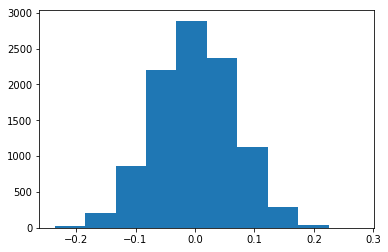

In [42]:
plt.hist(ts)
plt.show()